In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.style.use('bmh')

test in 1D of heat transfer equation and the method:

start T=100 at the left boundary and T=200 at the right boundary

k_left = 20, k_right = 40

at the mid point is the boundary of the two materials where k $\nabla$T is equal on both sides

=> $\nabla T_1$ = $k_2/k_1 \nabla T_2$

In [5]:
T_0 = np.append(np.append([100], [0 for  i in range(48)]), [200])

In [6]:
def new_imaginary_point(external_points, k_1, k_2, boundary_point, start, h, check = False):
    grad = (external_points[1] - external_points[0])/h
    ratio = k_1/k_2
    if not start:
        # aka if it's at the end
        new_point = boundary_point + 2*h*grad*ratio
    elif start:
        # if its at the start of the array
        new_point = boundary_point - 2*h*grad/ratio
    if check:
        print('\n')
        print(new_point)
        print('\n')
        input()
    return new_point


### Test 1: showing that at constant conductivity, it converges to a straight line

In [22]:
def update(T_0, T_k):
    n = len(T_0)
    T_kPlus1 = np.array([i for i in T_0])
    for index in range(n):
        if index != 0 and index != n-1:
            T_kPlus1[index] += 1/2*(T_k[index-1] + T_k[index+1])
    
    return T_kPlus1

<Figure size 1080x504 with 0 Axes>

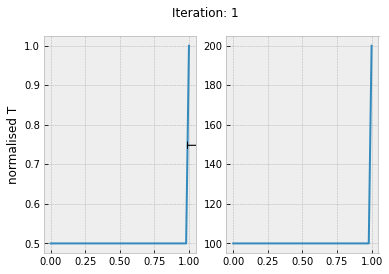

<Figure size 1080x504 with 0 Axes>

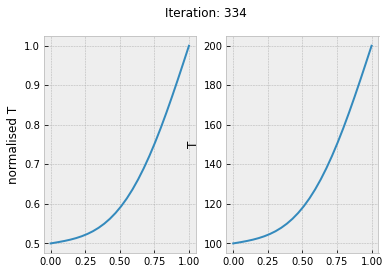

<Figure size 1080x504 with 0 Axes>

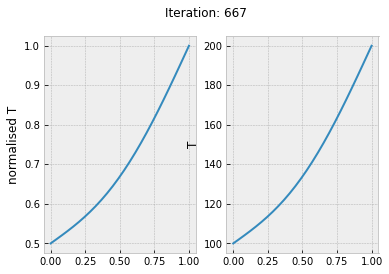

<Figure size 1080x504 with 0 Axes>

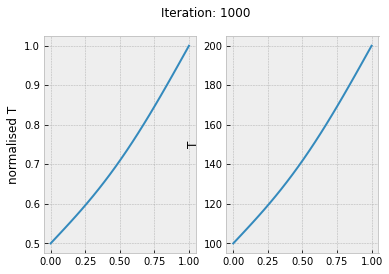

<Figure size 1080x504 with 0 Axes>

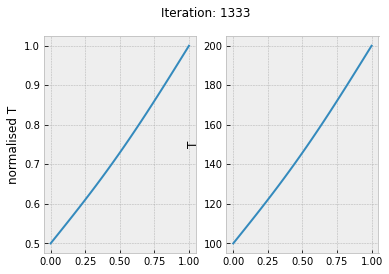

In [8]:
T_0max = max(T_0)
T_k = np.array([100/T_0max for i in T_0])
#T_k = np.array([i/T_0max for i in T_0])
T_0_hat = np.array([i/T_0max for i in T_0])

for i in range(1333):
    T_k = update(T_0_hat, T_k)
    if i%333 == 0:
        plt.figure(1, [15,7])
        fig, (ax1, ax2) = plt.subplots(1,2)
        fig.suptitle(f'Iteration: {i+1}')
        ax1.plot(np.linspace(0,1,len(T_0)), T_k)
        ax1.set_ylabel('normalised T')
        ax2.plot(np.linspace(0,1,len(T_0)), T_k*T_0max)
        ax2.set_ylabel('T')
        plt.show()

### Test 2: check that solution converges

converged
4101


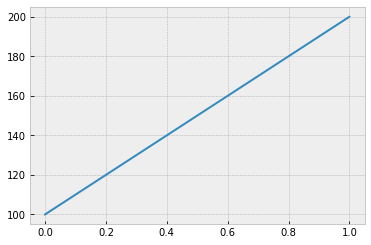

In [9]:
T_0max = max(T_0)
T_k = np.array([100/T_0max for i in T_0])
#T_k = np.array([i/T_0max for i in T_0])
T_0_hat = np.array([i/T_0max for i in T_0])
d = 1

iteration = 0
while d > 1e-6:
    iteration += 1
    T_kPlus1 = update(T_0_hat, T_k)
    d = np.sqrt(sum([(j - T_kPlus1[i])**2 for i, j in enumerate(T_k)]))
    T_k = np.array([i for i in T_kPlus1])
    if iteration == 15000:
        raise Exception('did not converge')

print('converged')
print(iteration)
plt.plot(np.linspace(0,1,len(T_0)), T_k*T_0max)

### Test 3: check that from a higher starting temp, the solution still converges down

converged
4101


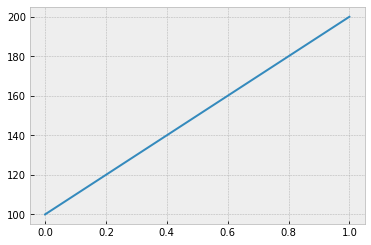

In [10]:
T_0max = max(T_0)
T_k = np.array([200/T_0max for i in T_0])
#T_k = np.array([i/T_0max for i in T_0])
T_0_hat = np.array([i/T_0max for i in T_0])
d = 1

iteration = 0
while d > 1e-6:
    iteration += 1
    T_kPlus1 = update(T_0_hat, T_k)
    d = np.sqrt(sum([(j - T_kPlus1[i])**2 for i, j in enumerate(T_k)]))
    T_k = np.array([i for i in T_kPlus1])
    if iteration == 10000:
        raise Exception('did not converge')

print('converged')
print(iteration)
plt.plot(np.linspace(0,1,len(T_0)), T_k*T_0max)

### Test 4: showing expected result for 2 materials with different conductivities

material 1 with k = 50, material 2 with k = 100

it will treat the problem as 2 different materials and iterate through 1 at a time, implementing new BC each time

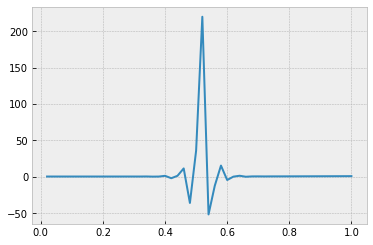

In [11]:
k1 = 50
k2 = 100

n = 26

x = np.linspace(0+1/50,1,50)
h = x[1]-x[0]
#input('value of h')
#print(h)


T_k_Material1 = np.array([0.5 for i in range(26)])
T_k_Material2 = np.array([0.5 for i in range(26)])
#input('Material 1 initial T')
#print(T_k_Material1)
#input('Material 2 initial T')
#print(T_k_Material2)

# we may initialise the starting values of the imaginary points like this as the entire system is in equelibrium

T_0_Material1 = np.append(np.append([0.5], [0 for  i in range(24)]), [new_imaginary_point([T_k_Material2[1], T_k_Material2[2]],
                                                                                         k1, k2, T_k_Material1[n-3], False, h)])
T_0_Material2 = np.append(np.append([new_imaginary_point([T_k_Material1[n-3], 
                                                          T_k_Material1[n-2]], k1, k2, T_k_Material2[2], 
                                                         True, h)], [0 for  i in range(24)]), [1])
#input('Material 1 initial T0')
#print(T_0_Material1)
#input('Material 2 initial T0')
#print(T_0_Material2)
# where the 0's in the seperate array are is where the new values will be put
# notice that the array is one longer as we are generating an imaginary point for each of the materials

#raise Exception('fin')

for i in range(190):
    # start by updating material 1
    T_k_Material1_update = update(T_0_Material1, T_k_Material1)
    #input('Material 1 first update')
    #print(T_k_Material1_update)
    
    # update material 2's imaginary point using the new array for material 1
    T_0_Material2[0] = new_imaginary_point([T_k_Material1_update[n-3], T_k_Material1_update[n-2]], k1, k2, T_k_Material2[2], True, h) 
    
    # update material 2
    T_k_Material2_update = update(T_0_Material2, T_k_Material2)
    
    # update material 1's imaginary point using new material 2's array
    T_0_Material1[n-1] = new_imaginary_point([T_k_Material2_update[1], T_k_Material2_update[2]]
                                             , k1, k2, T_k_Material1[n-3], False, h)
    
    # update the origonal T_k's to the new values of the updated arrrays
    T_k_Material1 = np.array([i for i in T_k_Material1_update])
    T_k_Material2 = np.array([i for i in T_k_Material2_update])

T = np.append([T_k_Material1[i] for i in range(n-1)], [T_k_Material2[i+1] for i in range(n-1)])
plt.plot(x, T)
   

In [12]:
def new_imaginary_point_2(points_in_order, k1, k2):
    # the points in order will be the 3rd to last in the left array and the 3rd of the right array
    return (k1*points_in_order[0] + k2*points_in_order[1])/(k1+k2)

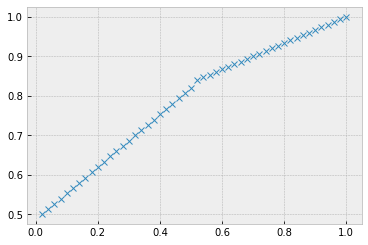

In [13]:
k1 = 50
k2 = 100

n = 26

x = np.linspace(0+1/50,1,50)
h = x[1]-x[0]


T_k_Material1 = np.array([0.5 for i in range(26)])
T_k_Material2 = np.array([0.5 for i in range(26)])


# we may initialise the starting values of the imaginary points like this as the entire system is in equelibrium

new_point = new_imaginary_point_2([T_k_Material1[n-3], T_k_Material2[2]], k1, k2)


T_0_Material1 = np.append(np.append([0.5], [0 for  i in range(24)]), [new_point])
T_0_Material2 = np.append(np.append([new_point], [0 for  i in range(24)]), [1])

# where the 0's in the seperate array are is where the new values will be put
# notice that the array is one longer as we are generating an imaginary point for each of the materials


for i in range(5000):
    # start by updating material 1
    T_k_Material1_update = update(T_0_Material1, T_k_Material1)
    
    # update material 2
    T_k_Material2_update = update(T_0_Material2, T_k_Material2)
    
    # with the updated arrays, update the T_0 with the new BC
    new_point = new_point = new_imaginary_point_2([T_k_Material1_update[n-3], T_k_Material2_update[2]], k1, k2)
    T_0_Material1 = np.append(np.append([0.5], [0 for  i in range(24)]), [new_point])
    T_0_Material2 = np.append(np.append([new_point], [0 for  i in range(24)]), [1])
    
    # update the origonal T_k's to the new values of the updated arrrays
    T_k_Material1 = np.array([i for i in T_k_Material1_update])
    T_k_Material2 = np.array([i for i in T_k_Material2_update])

T = np.append([T_k_Material1[i] for i in range(n-1)], [T_k_Material2[i+1] for i in range(n-1)])
plt.plot(x, T, 'x')
#plt.xlim(0.45, 0.55)

### Test 5: checking that as the stepsize decreases, the issue of the discontinuity decreases (compare with plot above)

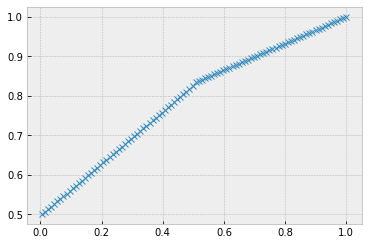

In [14]:
k1 = 50
k2 = 100

n = 51

x = np.linspace(0+1/200,1,(n-1)*2)
h = x[1]-x[0]


T_k_Material1 = np.array([0.5 for i in range(n)])
T_k_Material2 = np.array([0.5 for i in range(n)])


# we may initialise the starting values of the imaginary points like this as the entire system is in equilibrium

new_point = new_imaginary_point_2([T_k_Material1[n-3], T_k_Material2[2]], k1, k2)


T_0_Material1 = np.append(np.append([0.5], [0 for  i in range(n-2)]), [new_point])
T_0_Material2 = np.append(np.append([new_point], [0 for  i in range(n-2)]), [1])

# where the 0's in the seperate array are is where the new values will be put
# notice that the array is one longer as we are generating an imaginary point for each of the materials


for i in range(200*(n-1)):
    # start by updating material 1
    T_k_Material1_update = update(T_0_Material1, T_k_Material1)
    
    # update material 2
    T_k_Material2_update = update(T_0_Material2, T_k_Material2)
    
    # with the updated arrays, update the T_0 with the new BC
    new_point = new_point = new_imaginary_point_2([T_k_Material1_update[n-3], T_k_Material2_update[2]], k1, k2)
    T_0_Material1 = np.append(np.append([0.5], [0 for  i in range(n-2)]), [new_point])
    T_0_Material2 = np.append(np.append([new_point], [0 for  i in range(n-2)]), [1])
    
    # update the origonal T_k's to the new values of the updated arrrays
    T_k_Material1 = np.array([i for i in T_k_Material1_update])
    T_k_Material2 = np.array([i for i in T_k_Material2_update])

T = np.append([T_k_Material1[i] for i in range(n-1)], [T_k_Material2[i+1] for i in range(n-1)])
plt.plot(x, T, 'x')

0.7777777777777768
0.8166666666666531
0.8266653940655618
0.8285192941180403


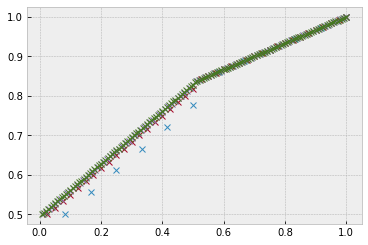

In [15]:
k1 = 50
k2 = 100

def example(n):
    x = np.linspace(0+1/((n-1)*2),1,(n-1)*2)
    h = x[1]-x[0]


    T_k_Material1 = np.array([0.5 for i in range(n)])
    T_k_Material2 = np.array([0.5 for i in range(n)])


    # we may initialise the starting values of the imaginary points like this as the entire system is in equilibrium

    new_point = new_imaginary_point_2([T_k_Material1[n-3], T_k_Material2[2]], k1, k2)


    T_0_Material1 = np.append(np.append([0.5], [0 for  i in range(n-2)]), [new_point])
    T_0_Material2 = np.append(np.append([new_point], [0 for  i in range(n-2)]), [1])

    # where the 0's in the seperate array are is where the new values will be put
    # notice that the array is one longer as we are generating an imaginary point for each of the materials


    for i in range(500*(n-1)):
        # start by updating material 1
        T_k_Material1_update = update(T_0_Material1, T_k_Material1)

        # update material 2
        T_k_Material2_update = update(T_0_Material2, T_k_Material2)

        # with the updated arrays, update the T_0 with the new BC
        new_point = new_point = new_imaginary_point_2([T_k_Material1_update[n-3], T_k_Material2_update[2]], k1, k2)
        T_0_Material1 = np.append(np.append([0.5], [0 for  i in range(n-2)]), [new_point])
        T_0_Material2 = np.append(np.append([new_point], [0 for  i in range(n-2)]), [1])

        # update the origonal T_k's to the new values of the updated arrrays
        T_k_Material1 = np.array([i for i in T_k_Material1_update])
        T_k_Material2 = np.array([i for i in T_k_Material2_update])

    T = np.append([T_k_Material1[i] for i in range(n-1)], [T_k_Material2[i+1] for i in range(n-1)])
    plt.plot(x, T, 'x')
    print(T_k_Material1[-2])
example(7)
example(21)
example(51)
example(71)

### Test 6: closer points in the imaginary point function

0.7777777777777767
0.8166666666666496
0.8266648094140829
0.8285082851653098


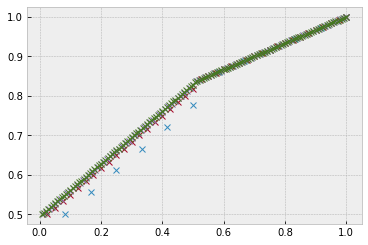

In [16]:
def example_2(n):
    x = np.linspace(0+1/((n-1)*2),1,(n-1)*2)
    h = x[1]-x[0]


    T_k_Material1 = np.array([0.5 for i in range(n)])
    T_k_Material2 = np.array([0.5 for i in range(n)])


    # we may initialise the starting values of the imaginary points like this as the entire system is in equilibrium

    new_point = new_imaginary_point_2([T_k_Material1[n-2], T_k_Material2[1]], k1, k2)


    T_0_Material1 = np.append(np.append([0.5], [0 for  i in range(n-2)]), [new_point])
    T_0_Material2 = np.append(np.append([new_point], [0 for  i in range(n-2)]), [1])

    # where the 0's in the seperate array are is where the new values will be put
    # notice that the array is one longer as we are generating an imaginary point for each of the materials


    for i in range(500*(n-1)):
        # start by updating material 1
        T_k_Material1_update = update(T_0_Material1, T_k_Material1)

        # update material 2
        T_k_Material2_update = update(T_0_Material2, T_k_Material2)

        # with the updated arrays, update the T_0 with the new BC
        new_point = new_point = new_imaginary_point_2([T_k_Material1_update[n-2], T_k_Material2_update[1]], k1, k2)
        T_0_Material1 = np.append(np.append([0.5], [0 for  i in range(n-2)]), [new_point])
        T_0_Material2 = np.append(np.append([new_point], [0 for  i in range(n-2)]), [1])

        # update the origonal T_k's to the new values of the updated arrrays
        T_k_Material1 = np.array([i for i in T_k_Material1_update])
        T_k_Material2 = np.array([i for i in T_k_Material2_update])

    T = np.append([T_k_Material1[i] for i in range(n-1)], [T_k_Material2[i+1] for i in range(n-1)])
    plt.plot(x, T, 'x')
    print(T_k_Material1[-2])
example_2(7)
example_2(21)
example_2(51)
example_2(71)